In [99]:
import pandas as pd

training = pd.read_csv(r'''/home/sagar/GitHub-Repos/Queen_City_Hackathon/training.csv''')

In [100]:
training.describe(include='all')

Unnamed: 0    Area_2015    Area_2013  Population_Density_2018  \
count  416.000000   416.000000   416.000000               416.000000   
mean   207.500000   702.608173   703.141827                 5.240385   
std    120.233107   693.139036   693.259458                 3.890663   
min      0.000000    66.000000    66.000000                 0.000000   
25%    103.750000   284.500000   284.500000                 3.000000   
50%    207.500000   487.000000   487.500000                 4.000000   
75%    311.250000   835.000000   834.250000                 7.000000   
max    415.000000  4494.000000  4494.000000                32.000000   

       Population _2018  Population_Density_2017  Population _2017  \
count        416.000000               416.000000        416.000000   
mean        2389.790865                 5.146635       2324.463942   
std         1391.627617                 3.861473       1339.733915   
min           17.000000                 0.000000         17.000000   
25%         1508.750000                 3.000000       1489.500000   
50%         2152.500000                 4.000000       2099.500000   
75%         2941.000000                 6.000000       2867.250000   
max        11922.000000                32.000000      11919.000000   

       Population_Density_2016  Population _2016  Population_Density_2015  \
count               416.000000        416.000000               416.000000   
mean                  5.045673       2275.278846                 4.987981   
std                   3.733964       1309.304993                 3.703121   
min                   0.000000         16.000000                 0.000000   
25%                   3.000000       1457.750000                 3.000000   
50%                   4.000000       2053.500000                 4.000000   
75%                   6.000000       2793.500000                 6.000000   
max                  32.000000      11854.000000                32.000000   

       ...  Transit_Proximate_Units_2013  Transit_Proximity_2011  \
count  ...                    416.000000              416.000000   
mean   ...                    597.783654               65.613149   
std    ...                    581.699418               39.804884   
min    ...                      0.000000                0.000000   
25%    ...                    188.000000               26.365000   
50%    ...                    508.500000               89.195000   
75%    ...                    830.000000              100.000000   
max    ...                   4746.000000              100.000000   

       Transit_Proximate_Units_2011  Transit_Ridership_2015  \
count                    416.000000              311.000000   
mean                     575.649038               65.025723   
std                      570.321902              148.795853   
min                        0.000000                0.000000   
25%                      166.500000                8.000000   
50%                      485.000000               29.000000   
75%                      799.500000               68.000000   
max                     4468.000000             2047.000000   

       Transit_Ridership_Total_2015  Transit_Ridership_2014  \
count                    311.000000              309.000000   
mean                    1234.881029               69.313916   
std                     7854.855293              162.667701   
min                        0.000000                0.000000   
25%                       31.000000               10.000000   
50%                      198.000000               31.000000   
75%                      664.500000               75.000000   
max                   131004.000000             2348.000000   

       Transit_Ridership_Total_2014  Transit_Ridership_2013  \
count                    309.000000              310.000000   
mean                    1321.161812               67.006452   
std                     8308.502350              148.420792   
min                        0.000

In [101]:
training.isnull().sum().sum()

8415

In [102]:
training.head()

Unnamed: 0  Area_2015  Area_2013  Population_Density_2018  \
0           0        411        411                        5   
1           1       1156       1156                        8   
2           2        329        329                        3   
3           3        167        167                        5   
4           4        403        403                        5   

   Population _2018  Population_Density_2017  Population _2017  \
0              2243                        5              2241   
1              9758                        8              8816   
2              1120                        3              1089   
3               772                        5               790   
4              1839                        5              1871   

   Population_Density_2016  Population _2016  Population_Density_2015  ...  \
0                        5              2240                        5  ...   
1                        7              7986                        7  ...   
2                        3              1080                        3  ...   
3                        5               790                        4  ...   
4                        5              1853                        4  ...   

   Transit_Proximate_Units_2013  Transit_Proximity_2011  \
0                          1081                   100.0   
1                          4746                   100.0   
2                           402                   100.0   
3                           329                   100.0   
4                           820                   100.0   

   Transit_Proximate_Units_2011  Transit_Ridership_2015  \
0                          1082                    35.0   
1                          4468                    34.0   
2                           401                     8.0   
3                           332                    17.0   
4                           825                    74.0   

   Transit_Ridership_Total_2015  Transit_Ridership_2014  \
0                         879.0                    43.0   
1                        2346.0                    35.0   
2                          59.0                     9.0   
3                          66.0                    15.0   
4                        1258.0                    77.0   

   Transit_Ridership_Total_2014  Transit_Ridership_2013  \
0                        1068.0                    54.0   
1                        2438.0                    33.0   
2                          60.0                     5.0   
3                          60.0                    17.0   
4                        1312.0                    86.0   

   Transit_Ridership_Total_2013    target  
0                        1348.0  0.160000  
1                        2697.0  0.708571  
2                          53.0 -0.014286  
3                          67.0 -0.008571  
4                        1375.0  0.091429  

[5 rows x 497 columns]

In [103]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [104]:
training = pd.DataFrame(imp_mean.fit_transform(training), columns=training.columns)

In [105]:
training.isnull().sum().sum()

0

In [106]:
# 

# training = (training-training.mean())/training.std()
training = (training-training.min())/(training.max()-training.min())

In [107]:
training.describe()

Unnamed: 0   Area_2015   Area_2013  Population_Density_2018  \
count  416.000000  416.000000  416.000000               416.000000   
mean     0.500000    0.143769    0.143889                 0.163762   
std      0.289718    0.156535    0.156563                 0.121583   
min      0.000000    0.000000    0.000000                 0.000000   
25%      0.250000    0.049345    0.049345                 0.093750   
50%      0.500000    0.095077    0.095190                 0.125000   
75%      0.750000    0.173668    0.173498                 0.218750   
max      1.000000    1.000000    1.000000                 1.000000   

       Population _2018  Population_Density_2017  Population _2017  \
count        416.000000               416.000000        416.000000   
mean           0.199310                 0.160832          0.193872   
std            0.116894                 0.120671          0.112564   
min            0.000000                 0.000000          0.000000   
25%            0.125304                 0.093750          0.123719   
50%            0.179378                 0.125000          0.174971   
75%            0.245611                 0.187500          0.239477   
max            1.000000                 1.000000          1.000000   

       Population_Density_2016  Population _2016  Population_Density_2015  \
count               416.000000        416.000000               416.000000   
mean                  0.157677          0.190850                 0.155874   
std                   0.116686          0.110602                 0.115723   
min                   0.000000          0.000000                 0.000000   
25%                   0.093750          0.121790                 0.093750   
50%                   0.125000          0.172115                 0.125000   
75%                   0.187500          0.234626                 0.187500   
max                   1.000000          1.000000                 1.000000   

       ...  Transit_Proximate_Units_2013  Transit_Proximity_2011  \
count  ...                    416.000000              416.000000   
mean   ...                      0.125955                0.656131   
std    ...                      0.122566                0.398049   
min    ...                      0.000000                0.000000   
25%    ...                      0.039612                0.263650   
50%    ...                      0.107143                0.891950   
75%    ...                      0.174884                1.000000   
max    ...                      1.000000                1.000000   

       Transit_Proximate_Units_2011  Transit_Ridership_2015  \
count                    416.000000              416.000000   
mean                       0.128838                0.031766   
std                        0.127646                0.062825   
min                        0.000000                0.000000   
25%                        0.037265                0.006351   
50%                        0.108550                0.025892   
75%                        0.178939                0.031766   
max                        1.000000                1.000000   

       Transit_Ridership_Total_2015  Transit_Ridership_2014  \
count                    416.000000              416.000000   
mean                       0.009426                0.029520   
std                        0.051822                0.059684   
min                        0.000000                0.000000   
25%                        0.000473                0.006388   
50%                        0.003473                0.024276   
75%                        0.009426                0.029520   
max                        1.000000                1.000000   

       Transit_Ridership_Total_2014  Transit_Ridership_2013  \
count                    416.000000              416.000000   
mean                       0.009539                0.031969   
std                        0.051679                0.061102   
min                        0.000000               

In [108]:
training_labels = training['target'].to_numpy()
training_data = training.drop(columns=['target', 'Unnamed: 0']).to_numpy()

In [109]:
training_data.shape

(416, 495)

In [110]:
print(training_labels.shape, training_data.shape)

(416,) (416, 495)


In [111]:
training_data[:300]

array([[7.79132791e-02, 7.79132791e-02, 1.56250000e-01, ...,
        7.71102431e-03, 2.57633588e-02, 9.59758494e-03],
       [2.46160795e-01, 2.46160795e-01, 2.50000000e-01, ...,
        1.76025068e-02, 1.57442748e-02, 1.92022898e-02],
       [5.93947606e-02, 5.93947606e-02, 9.37500000e-02, ...,
        4.33203613e-04, 2.38549618e-03, 3.77353117e-04],
       ...,
       [6.84281843e-02, 6.84281843e-02, 3.75000000e-01, ...,
        9.27344534e-02, 1.65076336e-01, 1.05893828e-01],
       [4.83288166e-02, 4.83288166e-02, 6.25000000e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [4.42637760e-02, 4.42637760e-02, 2.18750000e-01, ...,
        3.38620824e-03, 3.81679389e-02, 3.41041779e-03]])

In [112]:
train_X = training_data[:300]
val_X = training_data[300:]
train_Y = training_labels[:300]
val_Y = training_labels[300:]

In [113]:
print(train_X.shape, train_Y.shape, val_X.shape, val_Y.shape)

(300, 495) (300,) (116, 495) (116,)


In [114]:
train_X.shape[0]

300

In [115]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))

In [156]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 50)                109200    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 109,251
Trainable params: 109,251
Non-trainable params: 0
_________________________________________________________________


In [96]:
# model = models.Sequential()
# model.add(layers.Dense(64, activation='relu', input_shape=(train_X.shape[1],)))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(1))
# model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

In [160]:
history = model.fit(train_X, train_Y, epochs= 50, batch_size=30, validation_data=(val_X, val_Y))

Train on 300 samples, validate on 116 samples
Epoch 1/50
300/300 [==============================] - 0s 259us/step - loss: 7.3607e-04 - mean_squared_error: 7.3607e-04 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 2/50
300/300 [==============================] - 0s 213us/step - loss: 7.1409e-04 - mean_squared_error: 7.1409e-04 - val_loss: 9.1072e-04 - val_mean_squared_error: 9.1072e-04
Epoch 3/50
300/300 [==============================] - 0s 209us/step - loss: 7.1547e-04 - mean_squared_error: 7.1547e-04 - val_loss: 4.2388e-04 - val_mean_squared_error: 4.2388e-04
Epoch 4/50
300/300 [==============================] - 0s 201us/step - loss: 5.5187e-04 - mean_squared_error: 5.5187e-04 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 5/50
300/300 [==============================] - 0s 183us/step - loss: 5.3989e-04 - mean_squared_error: 5.3989e-04 - val_loss: 5.0946e-04 - val_mean_squared_error: 5.0946e-04
Epoch 6/50
300/300 [==============================] - 0s 199us/step - 

300/300 [==============================] - 0s 187us/step - loss: 1.6568e-04 - mean_squared_error: 1.6568e-04 - val_loss: 8.6785e-04 - val_mean_squared_error: 8.6785e-04
Epoch 47/50
300/300 [==============================] - 0s 211us/step - loss: 1.8245e-04 - mean_squared_error: 1.8245e-04 - val_loss: 4.2065e-04 - val_mean_squared_error: 4.2065e-04
Epoch 48/50
300/300 [==============================] - 0s 208us/step - loss: 2.6230e-04 - mean_squared_error: 2.6230e-04 - val_loss: 5.2581e-04 - val_mean_squared_error: 5.2581e-04
Epoch 49/50
300/300 [==============================] - 0s 149us/step - loss: 1.6946e-04 - mean_squared_error: 1.6946e-04 - val_loss: 8.4274e-04 - val_mean_squared_error: 8.4274e-04
Epoch 50/50
300/300 [==============================] - 0s 147us/step - loss: 1.1524e-04 - mean_squared_error: 1.1524e-04 - val_loss: 3.9587e-04 - val_mean_squared_error: 3.9587e-04


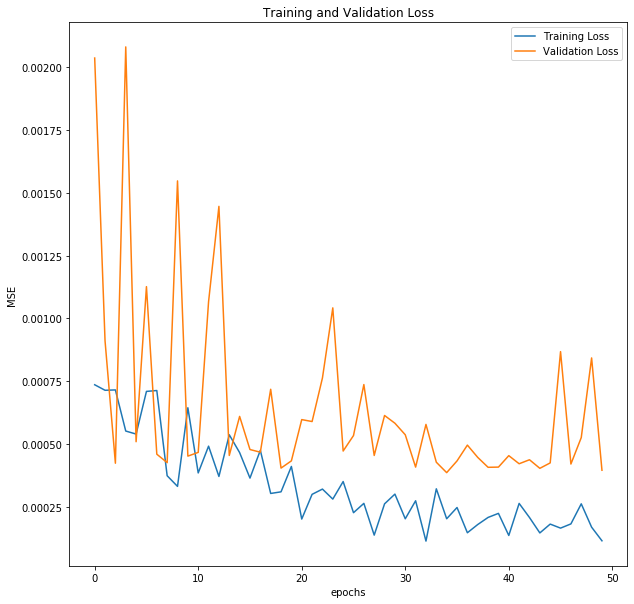

In [161]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('MSE')

plt.legend()
plt.show()

In [162]:
mse_score, mae_score = model.evaluate(val_X, val_Y)
mse_score

116/116 [==============================] - 0s 56us/step


0.000395873255409493

In [163]:
testing = pd.read_csv(r'''/home/sagar/GitHub-Repos/Queen_City_Hackathon/testing.csv''')

In [164]:
testing = pd.DataFrame(imp_mean.fit_transform(testing), columns=testing.columns)

In [165]:
testing.isnull().sum().sum()

0

In [166]:
testing = (testing-testing.min())/(testing.max()-testing.min())

In [167]:
testing.columns

Index(['Unnamed: 0', 'Area_2015', 'Area_2013', 'Population_Density_2018',
       'Population _2018', 'Population_Density_2017', 'Population _2017',
       'Population_Density_2016', 'Population _2016',
       'Population_Density_2015',
       ...
       'Transit_Proximity_2013', 'Transit_Proximate_Units_2013',
       'Transit_Proximity_2011', 'Transit_Proximate_Units_2011',
       'Transit_Ridership_2015', 'Transit_Ridership_Total_2015',
       'Transit_Ridership_2014', 'Transit_Ridership_Total_2014',
       'Transit_Ridership_2013', 'Transit_Ridership_Total_2013'],
      dtype='object', length=496)

In [168]:
training.columns

Index(['Unnamed: 0', 'Area_2015', 'Area_2013', 'Population_Density_2018',
       'Population _2018', 'Population_Density_2017', 'Population _2017',
       'Population_Density_2016', 'Population _2016',
       'Population_Density_2015',
       ...
       'Transit_Proximate_Units_2013', 'Transit_Proximity_2011',
       'Transit_Proximate_Units_2011', 'Transit_Ridership_2015',
       'Transit_Ridership_Total_2015', 'Transit_Ridership_2014',
       'Transit_Ridership_Total_2014', 'Transit_Ridership_2013',
       'Transit_Ridership_Total_2013', 'target'],
      dtype='object', length=497)

In [169]:
test_X = testing.drop(columns='Unnamed: 0').to_numpy()

In [170]:
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [171]:
test_X.shape

(45, 1, 495)

In [128]:
test_X.shape

(45, 1, 495)

In [172]:
predictions = model.predict(test_X)

In [173]:
predictions

array([[0.17303121],
       [0.18796107],
       [0.16940863],
       [0.19946305],
       [0.16256775],
       [0.21059442],
       [0.19934212],
       [0.33011863],
       [0.21016671],
       [0.18850632],
       [0.1631484 ],
       [0.16116463],
       [0.19758566],
       [0.23771204],
       [0.15557127],
       [0.17097028],
       [0.17303888],
       [0.21861814],
       [0.19045103],
       [0.20152159],
       [0.16619365],
       [0.19181824],
       [0.24579352],
       [0.20929165],
       [0.18828104],
       [0.17661165],
       [0.18084653],
       [0.21681418],
       [0.17345513],
       [0.17107584],
       [0.21038349],
       [0.21924831],
       [0.18122318],
       [0.1924985 ],
       [0.18946716],
       [0.15492193],
       [0.17071426],
       [0.16523966],
       [0.21463789],
       [0.17130826],
       [0.18095002],
       [0.16462752],
       [0.20008132],
       [0.18403275],
       [0.21728288]], dtype=float32)

In [174]:
preds = pd.DataFrame(predictions)
preds

0
0   0.173031
1   0.187961
2   0.169409
3   0.199463
4   0.162568
5   0.210594
6   0.199342
7   0.330119
8   0.210167
9   0.188506
10  0.163148
11  0.161165
12  0.197586
13  0.237712
14  0.155571
15  0.170970
16  0.173039
17  0.218618
18  0.190451
19  0.201522
20  0.166194
21  0.191818
22  0.245794
23  0.209292
24  0.188281
25  0.176612
26  0.180847
27  0.216814
28  0.173455
29  0.171076
30  0.210383
31  0.219248
32  0.181223
33  0.192499
34  0.189467
35  0.154922
36  0.170714
37  0.165240
38  0.214638
39  0.171308
40  0.180950
41  0.164628
42  0.200081
43  0.184033
44  0.217283

In [175]:
preds.to_csv(r'''/home/sagar/GitHub-Repos/Queen_City_Hackathon/predictions.csv''')